Hooke's Law
==========

We are going to "learn" Hooke's law from data.  I have provided you
with data from some experiments, where I attached a weight $x$ to a spring
and measured the elongation $y$ of the spring.

You should follow the machine learning procedure to train a linear model
$$
    \hat y = f(x; \theta) = \theta x
$$
and validate it against the data.  You should follow the step-by-step
procedure outlined in the lecture.

Step 1: Get data
---------------

You should find a text file `spring.dat` in your directory.  This file
has a set of rows, each row containing `x y` ($x$ and associated $y$
value).

Use numpy's `loadtxt` function to load that data as a matrix and then
assign the first column to `x` and the second column to `y`.

In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [189]:
# YOUR CODE HERE
data = np.loadtxt("spring.dat")
x = data[:, 0]
y = data[:, 1]

In [190]:
x

array([0.052, 0.052, 0.06 , 0.074, 0.083, 0.084, 0.087, 0.098, 0.103,
       0.143, 0.15 , 0.154, 0.157, 0.166, 0.187, 0.192, 0.193, 0.203,
       0.218, 0.234, 0.25 , 0.253, 0.255, 0.259, 0.261, 0.267, 0.291,
       0.304, 0.31 , 0.315, 0.329, 0.344, 0.357, 0.361, 0.384, 0.384,
       0.397, 0.406, 0.411, 0.416, 0.416, 0.431, 0.433, 0.437, 0.445,
       0.446, 0.45 , 0.47 , 0.475, 0.478, 0.478, 0.478, 0.491, 0.491,
       0.494, 0.507, 0.511, 0.512, 0.526, 0.548, 0.576, 0.589, 0.597,
       0.598, 0.599, 0.611, 0.622, 0.635, 0.636, 0.645, 0.657, 0.666,
       0.681, 0.706, 0.713, 0.716, 0.741, 0.742, 0.745, 0.746, 0.756,
       0.76 , 0.796, 0.799, 0.821, 0.83 , 0.834, 0.839, 0.842, 0.857,
       0.857, 0.87 , 0.873, 0.884, 0.912, 0.922, 0.93 , 0.947, 0.955,
       0.994])

In [191]:
assert (x, y) is not None
assert x.shape == y.shape == (100,)
np.testing.assert_allclose(x.sum(), 49.26, atol=1e-12, rtol=1e-12)
np.testing.assert_allclose(y.sum(), 92.868096, atol=1e-12, rtol=1e-12)

Let's plot the data to get a feel:

Make a plot of $y$ over $x$, but please **do not** connect
the points using lines (you can just use a marker like `+` etc.
as a plot style to not plot lines or alternatively use `pl.scatter`).

Remember: plots have x and y axis labels and a title!

Text(0, 0.5, 'spring elongation')

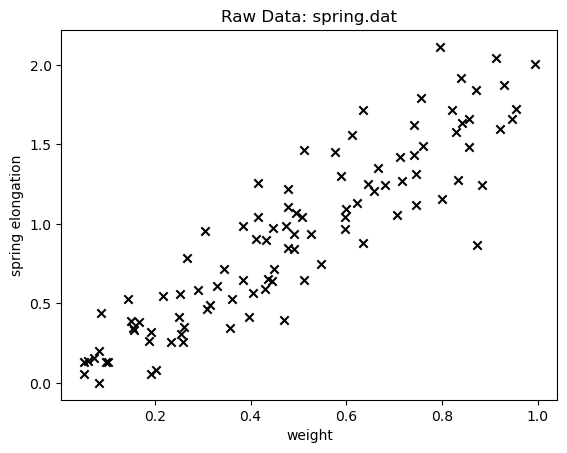

In [192]:
plt.scatter(x, y, marker="x", c="k")
plt.title("Raw Data: spring.dat")
plt.xlabel("weight")
plt.ylabel("spring elongation")

Step 2: Split data into training and validation sets
--------------------------------------------------------------

Partition your data into two, about equally large, sets:

 - a training set with `xtrain` and corresponding `ytrain`
 - a validation set with `xtest` and corresponding `ytest`
 
To avoid biasing your results, it is important to do this
**randomly**.  For this we are going to use a random number
generator (see next line).

The simplest way of splitting up the data is then the following:

 * for each data point, generate a random number between 0 and 1.
 If that number is greater than 0.5, put the corresponding `x`
 and `y` into the validation set, otherwise put it in the training
 set.  Be careful not to separate pairs of `x` and `y`.

In [193]:
# Creates a new pseudo-random number generator
random = np.random.default_rng(4711)

In [194]:
# Get a random number uniformly distributed between 0 and 1
random.uniform()

0.21028203806552237

In [195]:
# Another random number
random.uniform()

0.19035669209741035

In [196]:
# You should fill the variables xtest, ytest, xtrain, ytrain here
# I know this next line is nasty but wanted to test using eval ;P
xtest, xtrain, ytest, ytrain = eval(4*"np.array([]),")

for xi, yi in zip(x, y):
    if random.uniform() >= 0.5:
        xtest = np.append(xtest, xi)
        ytest = np.append(ytest, yi)
    else:
        xtrain = np.append(xtrain, xi)
        ytrain = np.append(ytrain, yi)

In [197]:
assert (xtest, ytest, xtrain, ytrain) is not None
assert xtest.size == ytest.size
assert xtrain.size == ytrain.size
assert xtest.size > 25 and xtest.size < 75

dfull = np.sort(np.rec.fromarrays([x,y], names="x,y"))
dsplit = np.sort(np.rec.fromarrays(
    [np.hstack([xtrain,xtest]), np.hstack([ytrain,ytest])],
    names="x,y"))
np.testing.assert_allclose(
    dfull["x"], dsplit["x"], err_msg='some x values are missing/incorrect')
np.testing.assert_allclose(
    dfull["y"], dsplit["y"], err_msg='some y values are missing/incorrect')
del dfull, dsplit

Let's again plot the training and validation set to make sure we haven't biased either set in any way.

You should modify the plot above to plot x and y values in the training set as a point cloud
and (in another color) the x and y values in the validation set.

Be sure to give each set of points a **label**, include a figure **title** and also show a **legend**.  You can
do so with `pl.plot(..., label='some label text')` and `pl.legend()`.

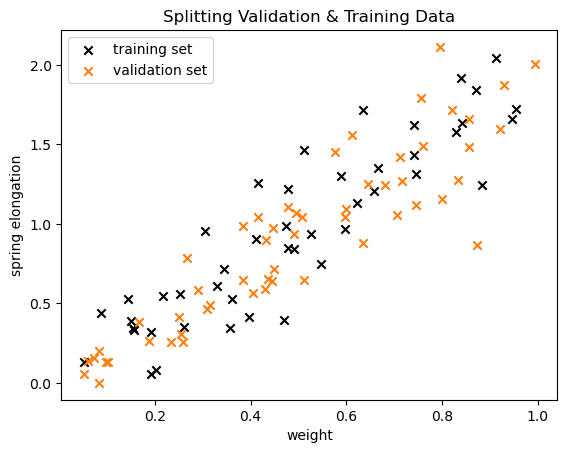

In [198]:
plt.scatter(xtrain, ytrain, marker="x", c="k", label="training set")
plt.scatter(xtest, ytest, marker="x", c="C1", label="validation set")

plt.title("Splitting Validation & Training Data")
plt.xlabel("weight")
plt.ylabel("spring elongation")

plt.legend()

Step 3: Formulate and train linear model
--------------------------

Let us now formulate our model and train it on the data.
First let us define a model function `fmodel` that depends on
a feature vector `x` and some parameters `theta` and
predicts a label `y`.

(Hint: `a.T` gives the transpose of a numpy array `a`)

In [199]:
def fmodel(x, theta):
    # assume x and theta are vectors and try to calc dot product
    try:
        return x @ theta
    
    # if this fails check if both are a scalar and then return product
    except:
        assert np.isscalar(x) and np.isscalar(theta)
        return x * theta

In [200]:
assert fmodel(np.array([2]), np.array([8])) == 16
assert fmodel(np.array([2,4]), np.array([8,2])) == 24
assert fmodel(np.array([1.0,1.0,1.0]), np.array([8.0,2.0,5.0])) == 15.0

Let us train the parameter `theta` now on the training set data.

For this, first take the label vector of all the $y$ values in the training set
and also create the design matrix $X$, i.e., a matrix where the rows correspond to
observations and columns correspond to features in $x$.

Then solve the **normal equations** to get the fitted value of theta.

(Hint: `np.reshape`)

In [201]:
# In this case design matrix is the same as the training data
label_vector = ytrain
X = xtrain

# PROBLEM: If X is one dimensional X.T @ X spits out a scalar and not a 1x1 matrix. Additionally @ does not do scalar, matrix multiplication
# thus we need to check if X.T @ X is a scalar and write a separate function from the general case just for this one
XTX = X.T @ X

# if XTX is a scalar
if np.isscalar(XTX):
    theta = (1 / XTX) * X.T @ label_vector

# general case, except above exception
else:
    theta = np.linalg.inv(XTX) @ X.T @ label_vector

In [202]:
theta

1.9396296035003595

In [203]:
assert theta is not None
assert theta > 1.2 and theta < 2.5


Step 4: Validate results
----------------------------
Now that we have trained our model, we should check if the model gives
useful results for the validation set.  **This is the crucial step in learning
that separates it from pure model fitting**.

First, since our data is so low-dimensional, we can actually plot the
model prediction together with the validation set.  Modify the plot above
to (1) only plot the points in the validation set and (2) plot a line
$\hat y = f(x)$ corresponding to the linear model. Do not forget
labels, title and legend!

Hint: you can use `np.linspace` to get a vector of equally spaced points.

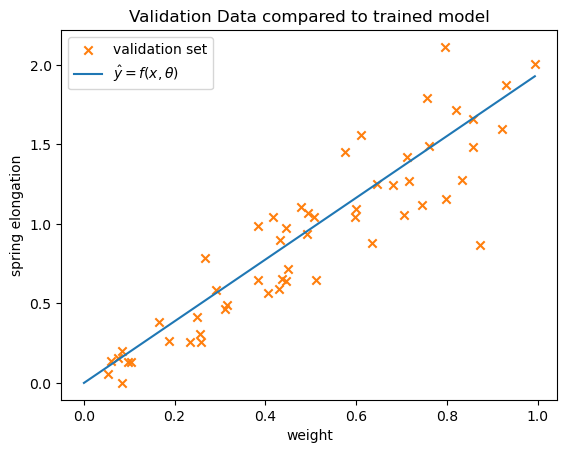

In [213]:
plt.scatter(xtest, ytest, marker="x", c="C1", label="validation set")

x_hat = np.linspace(0, max(xtest), 3)
y_hat = [fmodel(xi, theta) for xi in x_hat]
plt.plot(x_hat, y_hat, label=r"$\hat{y} = f(x, \theta)$")

plt.title("Validation Data compared to trained model")
plt.xlabel("weight")
plt.ylabel("spring elongation")

plt.legend()

We are striving for a more quantitative approach: to do so, we are going to
define the **loss function**, which takes a vector of `x` points, a vector
of `y` points and the model parameter `theta`, and returns the loss:
$$
    \operatorname{loss}(x,y,\theta) = \frac{1}{N'} \sum_{n=1}^{N'} |y_n - f(x_n; \theta)|^2
$$

In [209]:
def loss(x, y, theta):
    return 1 / len(x) * sum([np.abs(yi - fmodel(xi, theta)) ** 2 for xi, yi in zip(x, y)])

In [206]:
assert loss(xtrain, ytrain, theta) > 0


Now we compute the loss for the training set and the validation set

(called the "in"-error and the "out"-error)

In [207]:
E_in = loss(xtrain, ytrain, theta)
print ("Training ('in') error:    %.4g" % E_in)

Training ('in') error:    0.05635


In [208]:
E_out = loss(xtest, ytest, theta)
print ("Validation ('out') error: %.4g" % E_out)

Validation ('out') error: 0.05321


Observe that these values are similar in magnitude.

 a) What does this mean for the "learning procedure"?

 b) What would we have to conclude if the validation loss had been much greater than the training loss?
 

YOUR ANSWER HERE

a) If the 'out Error' is of similar magnitude to the 'in Error' then that means our model is equally good at describing the validation data as it is the training data. If we had overfit the training data then we would expect the ('in') error to be smaller than the ('out') error. Since this is not the case it indicates that the procedure worked very well and for the chosen model (linear with intercept through the origin) and the given data our fit is pretty much as good as it gets.

b) If the validation loss had been much greater than the training loss it would either mean that we had overfit the model to the training data, or that we chose our training set poorly and in such a way that it was not representative of the entire data set.

Epilogue
---------

I lied to you.

You did not actually fit Hooke's law.  You instead fitted a normalized expected salary $y$ of
a job seeker based on a proprietary aptitude score $x$, calculated at the Department of Public Employment Service and Obsolescence Support (PESOS).

The top brass at PESOS are quite impressed with the model and want it to form the basis of a more
efficient distribution of funds to apt job seekers.  Reasons given:

 1. The model is fair, because it does not rely on human input.
 
 2. The model is based on cutting-edge technology, therefore it is trustworthy.
 
Discuss (briefly, I have a meeting later with them).

YOUR ANSWER HERE

1. There are a variety of arguments that can be made to counter the statement that "the model is fair, because it does not rely on human input"
>+ Single shot split of dataset into validation and testing so testing data may not necessarily be representative of the whole set. (cross-validation methods could be used)
>+ Small dataset, R^2 value could be worse with more data (so data not necessarily representative of entire population)
>+ Proprietary aptitude test may not be fair, and may be designed with disregard for many possible biases (questions on test may not reflect real value the job seeker could provide).
>+ The model does rely on human input, the scores of the aptitude tests in the training set are "human input"
2. This linear regression is pretty much the simplest possible method of fitting a model to some data and has been invented over 200 years ago. Does not seem that cutting edge to me. Any cutting edge method would surely use datasets with a lot more independent variables ("feautures") and then also use more sophisticated methods of training the model rather than just a simple linear fit. And on top of that there are much more sophisticated methods of evaluating the performance of a model rather than just calculating a single loss value.